In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("milknew.csv")

In [3]:
df

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


# Describe each categorization to find differences and find important values

In [4]:
df.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [5]:
df[df['Grade'] == 'high'].describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000
mean,6.692578,40.648438,0.664062,0.750000,0.996094,0.632812,252.539062
std,0.108752,3.739749,0.473242,0.433861,0.062500,0.482982,3.711989
min,6.500000,35.000000,0.000000,0.000000,0.000000,0.000000,245.000000
25%,6.600000,37.000000,0.000000,0.750000,1.000000,0.000000,250.000000
50%,6.700000,40.000000,1.000000,1.000000,1.000000,1.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [6]:
df[df['Grade'] == 'medium'].describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,6.635027,39.721925,0.414439,0.163102,0.385027,0.125668,250.336898
std,0.130899,3.613751,0.493285,0.369953,0.487253,0.331919,5.262430
min,6.400000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,37.000000,0.000000,0.000000,0.000000,0.000000,245.000000
50%,6.600000,38.000000,0.000000,0.000000,0.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,0.000000,1.000000,0.000000,255.000000
max,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [7]:
df[df['Grade'] == 'low'].describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000
mean,6.588578,50.289044,0.592075,0.477855,0.727273,0.724942,252.734266
std,2.194712,13.043794,0.492023,0.500093,0.445882,0.447065,3.233046
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,245.000000
25%,4.700000,40.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.800000,45.000000,1.000000,0.000000,1.000000,1.000000,255.000000
75%,8.600000,55.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [8]:
df.nunique()

pH            16
Temprature    17
Taste          2
Odor           2
Fat            2
Turbidity      2
Colour         9
Grade          3
dtype: int64

### Based from the results of the means we can have the following conclusion:
- A milk with a grade of *high* almost certainly has fat
- A milk with a grade of *medium* may or may not have fat
- A milk with a grade of *low* may have fat but is less likely to have one compared to a *high* grade

- It appears that taste does not matter in any of the grades as it appears to be almost perfectly random with high standard deviation on each of them.

- With pH, it appears to matter with *low* grade having a pH level of around 6.59, *medium* grade around 6.64, and *high* grade around 6.69 with little deviation of approximately 0.1 except for *low* grade with 2.19 standard deviation. 

- Temprature also seems to matter between *high* and *medium* grade milk with low standard deviation compared to the *low* grade with very high standard deviation, it also appears that both *high* grade and *medium* grade milk almost have the same temprature compared to the *low* grade milk.

- For odor, a *high* grade milk will likely have odor, a *medium* grade milk will unlikely have odor, and for a *low* grade milk, odor does not matter. 

- For turbidity, a *medium* grade milk will likely have none, whilst a *low* and *high* grade milk will either have one or not, where-in a *low* grade milk is more likely to have turbidity.

- As for colour, both *low* and *high* grade milk have almost the same colour, whilst the *medium* grade is different from the two of them.

With the following insights, we can safely assume that taste is not needed for the prediction of milk grade and can remove it. Thus the following indicators that would be used would be:
1. Fat Content
2. pH level
3. Temprature
4. Turbidity
5. Odor
6. Colour

In [57]:
from tensorflow.keras.utils import plot_model,to_categorical
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [66]:
grades = {"high": 0, "medium": 1, "low": 2}
a = []
for row in df.index:
    a.append(grades[df['Grade'][row]])
y = a
x = df.drop(['Grade'], axis=1)
x = x.drop(['Taste'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0,train_size= 0.75)

In [67]:
model = linear_model.LogisticRegression(solver='liblinear', random_state=0)
model.fit(x_train,y_train)

LogisticRegression(random_state=0, solver='liblinear')

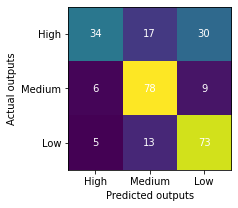

In [84]:
y_predict = model.predict(x_test)
categories = ["High", "Medium", "Low"]
cm = confusion_matrix(y_test, y_predict)

fig, ax = plt.subplots(figsize=(3,3))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=10, color='black')
ax.set_ylabel('Actual outputs', fontsize=10, color='black')
plt.xticks(np.arange(0,3), categories)
plt.yticks(np.arange(0,3), categories)
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [85]:
print(classification_report(y_test, y_predict, target_names = categories))

              precision    recall  f1-score   support

        High       0.76      0.42      0.54        81
      Medium       0.72      0.84      0.78        93
         Low       0.65      0.80      0.72        91

    accuracy                           0.70       265
   macro avg       0.71      0.69      0.68       265
weighted avg       0.71      0.70      0.68       265

